# StackOverflow 2018 Survey

## Getting started

1. How many people are there like me? What fraction of this sample - fraction or breakdown/barchart (acknowledge nans)
2. How do I compare with others in terms of years coding - distribution plots
3. How does my group compare with others in terms of years coding
4. Where are the best job opportunities for people like me? (jobs with high job satisfaction)
5. Anything that could boost salary?
6. Other odd things about us (i.e., categories that stand out from rest of population

In [52]:
from   collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   pathlib import Path
from   pprint import pprint
import seaborn as sns

from   sklearn.preprocessing import Imputer, StandardScaler
from   sklearn.decomposition import PCA
from   sklearn.cluster import MiniBatchKMeans

%matplotlib inline

## Exploratory Data Analysis

In [53]:
csv_path = Path("../data/survey_results_public.csv")
schema_path = Path("../data/survey_results_schema.csv")

In [54]:
df = pd.read_csv(csv_path, low_memory=False)
schema = pd.read_csv(schema_path)

In [55]:
df.shape

(98855, 129)

In [265]:
# pprint(list(df.columns))

In [5]:
schema.shape

(129, 2)

In [6]:
pprint(list(df.FormalEducation.unique()))

['Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Associate degree',
 'Some college/university study without earning a degree',
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, '
 'etc.)',
 nan,
 'Primary/elementary school',
 'Professional degree (JD, MD, etc.)',
 'I never completed any formal education',
 'Other doctoral degree (Ph.D, Ed.D., etc.)']


In [7]:
pprint(list(df.UndergradMajor.unique()))

['Mathematics or statistics',
 'A natural science (ex. biology, chemistry, physics)',
 'Computer science, computer engineering, or software engineering',
 'Fine arts or performing arts (ex. graphic design, music, studio art)',
 'Information systems, information technology, or system administration',
 'Another engineering discipline (ex. civil, electrical, mechanical)',
 nan,
 'A business discipline (ex. accounting, finance, marketing)',
 'A social science (ex. anthropology, psychology, political science)',
 'Web development or web design',
 'A humanities discipline (ex. literature, history, philosophy)',
 'A health science (ex. nursing, pharmacy, radiology)',
 'I never declared a major']


In [24]:
undergrad_counter = Counter(df.UndergradMajor)
undergrad_data = pd.Series(dict(undergrad_counter))
undergrad_data = undergrad_data.reset_index()
undergrad_data.columns = ['major', 'count']
undergrad_data

,major,count
0,Mathematics or statistics,2818
1,"A natural science (ex. biology, chemistry, phy...",3050
2,"Computer science, computer engineering, or sof...",50336
3,Fine arts or performing arts (ex. graphic desi...,1135
4,"Information systems, information technology, o...",6507
5,"Another engineering discipline (ex. civil, ele...",6945
6,NaN,19819
7,"A business discipline (ex. accounting, finance...",1921
8,"A social science (ex. anthropology, psychology...",1377
9,Web development or web design,2418


In [8]:
sum(df.FormalEducation == 'Other doctoral degree (Ph.D, Ed.D., etc.)')

2214

In [9]:
sum(df.FormalEducation == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)')

21396

In [10]:
sum(df.UndergradMajor.isin(['A natural science (ex. biology, chemistry, physics)', 'Another engineering discipline (ex. civil, electrical, mechanical)']))

9995

In [11]:
df.isnull().any().sum()

126

In [48]:
pprint(list(df.HopeFiveYears.unique()))

['Working as a founder or co-founder of my own company',
 "Working in a different or more specialized technical role than the one I'm "
 'in now',
 'Doing the same work',
 nan,
 'Working as an engineering manager or other functional manager',
 'Working in a career completely unrelated to software development',
 'Working as a product manager or project manager',
 'Retirement']


# Getting Serious

## Question 1: How many others are out there like me?

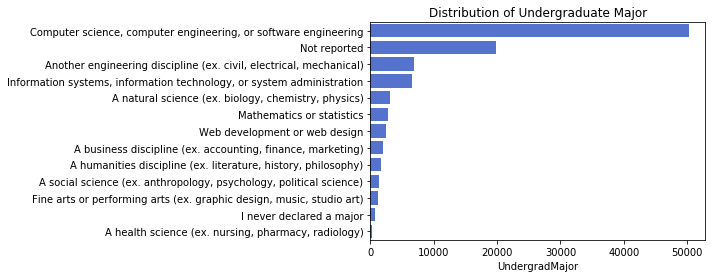

In [118]:
undergrad_breakdown = df.UndergradMajor.fillna('Not reported').value_counts()
sns.barplot(x=undergrad_breakdown, y=undergrad_breakdown.index, color='royalblue')
plt.title('Distribution of Undergraduate Major')
plt.show()

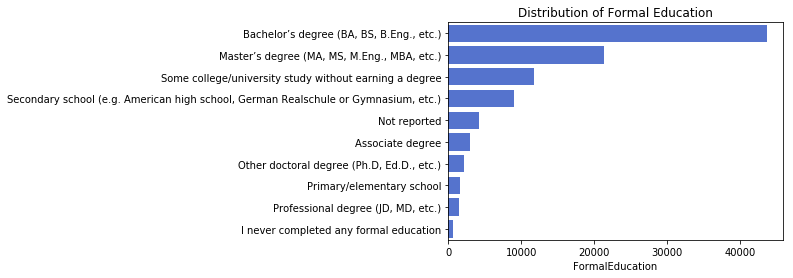

In [119]:
degree_breakdown = df.FormalEducation.fillna('Not reported').value_counts()
sns.barplot(x=degree_breakdown, y=degree_breakdown.index, color='royalblue')
plt.title("Distribution of Formal Education")
plt.show()

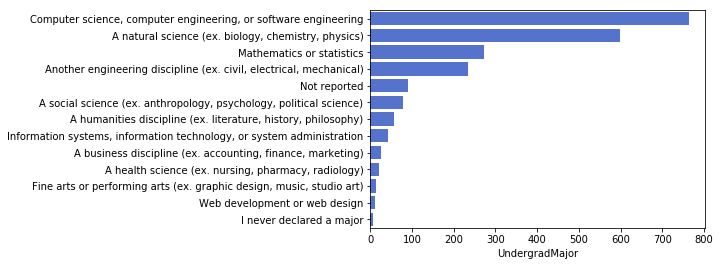

In [95]:
is_phd = df.FormalEducation.fillna('Not reported').str.contains('Other doctoral degree')
phd_field_breakdown = df.UndergradMajor.fillna('Not reported')[is_phd].value_counts()
sns.barplot(x=phd_field_breakdown, y=phd_field_breakdown.index, color='royalblue')
plt.show()

In [150]:
is_phd = df.FormalEducation.fillna('Not reported').str.contains('Other doctoral degree')
is_compsci = df.UndergradMajor.fillna('Not reported').str.contains('Computer science')
total_n = len(df)
num_phd = sum(is_phd)
num_not_compsci = sum(~is_compsci)
num_like_me = len(df[is_phd & ~is_compsci])
fraction_phd = num_phd / total_n
fraction_not_compsci = num_not_compsci / total_n
fraction_like_me = num_like_me / total_n

print(f"Total respondents: {total_n}\n")
print(f"Number of respondents without computer science undergrad degree: {num_not_compsci}")
print(f"Number of respondents with PhD: {num_phd}")
print(f"Number of respondents without compsci degree, but with PhD: {num_like_me}\n")
print(f"Fraction of respondents without computer science undergrad degree: {fraction_not_compsci:.2f}")
print(f"Fraction of respondents with PhD: {fraction_phd:.2f}")
print(f"Fraction of respondents with both conditions: {fraction_like_me:.2f}")


Total respondents: 98855

Number of respondents without computer science undergrad degree: 48519
Number of respondents with PhD: 2214
Number of respondents without compsci degree, but with PhD: 1449

Fraction of respondents without computer science undergrad degree: 0.49
Fraction of respondents with PhD: 0.02
Fraction of respondents with both conditions: 0.01


In [266]:
print(len(df[~is_compsci & ~is_phd]))
print(len(df[~is_compsci & is_phd]))
print(len(df[is_compsci & ~is_phd]))
print(len(df[is_compsci & is_phd]))

47070
1449
49571
765


## Question 2: How do I compare with others in terms of years coding?

In [355]:
def plot_cat_feature_dist(data, sorted_index, title, xlabel, color):
    dist = data.value_counts(dropna=False)
    dist_index = dist.index.fillna('Not reported')
    dist = dist.reindex(sorted_index)
    
    g = sns.barplot(x=dist.index, y=dist, color=color)
    
    plt.title(title)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    
    return g

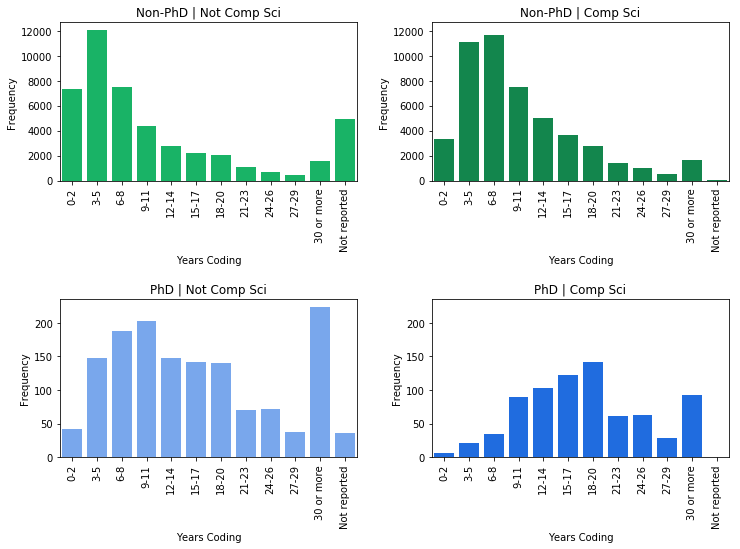

In [365]:
years_coding_df = df.YearsCoding.str.replace(' years', '').replace(np.nan, 'Not reported')

coding_index = [
        '0-2',
        '3-5',
        '6-8',
        '9-11',
        '12-14',
        '15-17',
        '18-20',
        '21-23',
        '24-26',
        '27-29',
        '30 or more',
        'Not reported',
]


plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.25, hspace=0.75)

plt.subplot(221)
ax1 = plot_cat_feature_dist(
          years_coding_df[~is_compsci & ~is_phd], 
          sorted_index=coding_index, 
          title='Non-PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#00cc66')

plt.subplot(222, sharey=ax1)
ax2 = plot_cat_feature_dist(
          years_coding_df[is_compsci & ~is_phd], 
          sorted_index=coding_index, 
          title='Non-PhD | Comp Sci',
          xlabel='Years Coding',
          color='#00994d')

plt.subplot(223)
ax3 = plot_cat_feature_dist(
          years_coding_df[~is_compsci & is_phd], 
          sorted_index=coding_index, 
          title='PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#66a3ff')

plt.subplot(224, sharey=ax3)
ax4 = plot_cat_feature_dist(
          years_coding_df[is_compsci & is_phd], 
          sorted_index=coding_index, 
          title='PhD | Comp Sci',
          xlabel='Years Coding',
          color='#0066ff')

plt.show()

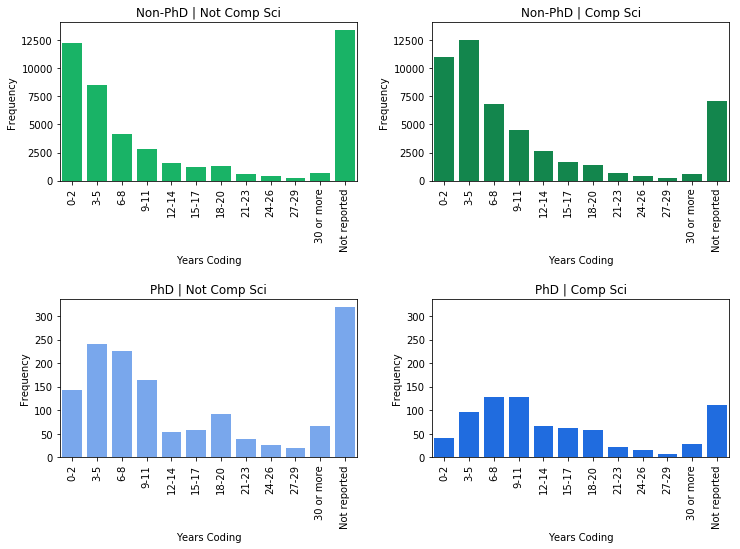

In [367]:
prof_years_coding_df = df.YearsCodingProf.str.replace(' years', '').replace(np.nan, 'Not reported')

prof_coding_index = [
        '0-2',
        '3-5',
        '6-8',
        '9-11',
        '12-14',
        '15-17',
        '18-20',
        '21-23',
        '24-26',
        '27-29',
        '30 or more',
        'Not reported',
]


plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.25, hspace=0.75)

plt.subplot(221)
ax1 = plot_cat_feature_dist(
          prof_years_coding_df[~is_compsci & ~is_phd], 
          sorted_index=prof_coding_index, 
          title='Non-PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#00cc66')

plt.subplot(222, sharey=ax1)
ax2 = plot_cat_feature_dist(
          prof_years_coding_df[is_compsci & ~is_phd], 
          sorted_index=prof_coding_index, 
          title='Non-PhD | Comp Sci',
          xlabel='Years Coding',
          color='#00994d')

plt.subplot(223)
ax3 = plot_cat_feature_dist(
          prof_years_coding_df[~is_compsci & is_phd], 
          sorted_index=prof_coding_index, 
          title='PhD | Not Comp Sci',
          xlabel='Years Coding',
          color='#66a3ff')

plt.subplot(224, sharey=ax3)
ax4 = plot_cat_feature_dist(
          prof_years_coding_df[is_compsci & is_phd], 
          sorted_index=prof_coding_index, 
          title='PhD | Comp Sci',
          xlabel='Years Coding',
          color='#0066ff')

plt.show()

## Where should I be working?

In [241]:
dev_types = set()
for answer in df.DevType.unique():
    if answer is not np.nan:
        for item in answer.split(';'):
            dev_types.add(item)
pprint(dev_types)

{'Back-end developer',
 'C-suite executive (CEO, CTO, etc.)',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'Desktop or enterprise applications developer',
 'DevOps specialist',
 'Educator or academic researcher',
 'Embedded applications or devices developer',
 'Engineering manager',
 'Front-end developer',
 'Full-stack developer',
 'Game or graphics developer',
 'Marketing or sales professional',
 'Mobile developer',
 'Product manager',
 'QA or test developer',
 'Student',
 'System administrator'}


In [240]:
phd_dev_types = set()
for answer in df[is_phd & ~is_compsci].DevType:
    if answer is not np.nan:
        for item in answer.split(';'):
            phd_dev_types.add(item)
pprint(phd_dev_types)

{'Back-end developer',
 'C-suite executive (CEO, CTO, etc.)',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'Desktop or enterprise applications developer',
 'DevOps specialist',
 'Educator or academic researcher',
 'Embedded applications or devices developer',
 'Engineering manager',
 'Front-end developer',
 'Full-stack developer',
 'Game or graphics developer',
 'Marketing or sales professional',
 'Mobile developer',
 'Product manager',
 'QA or test developer',
 'Student',
 'System administrator'}


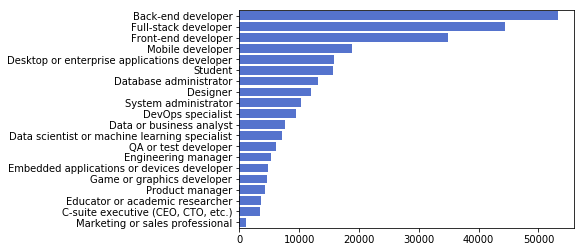

In [264]:
dev_list = list()
for answer in df.DevType:
    if answer is not np.nan:
        for item in answer.split(';'):
            dev_list.append(item)
dev_counts = Counter(dev_list)

dev_df = pd.Series(dict(dev_counts))
dev_df = dev_df.sort_values(ascending=False)
sns.barplot(x=dev_df, y=dev_df.index, color='royalblue')
plt.show()

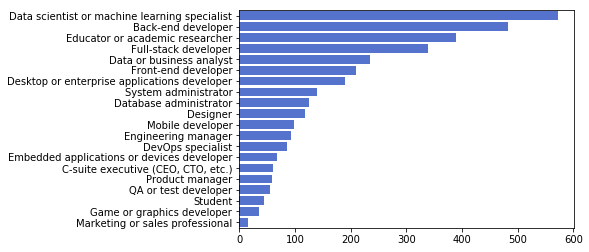

In [263]:
phd_dev_list = list()
for answer in df[is_phd & ~is_compsci].DevType:
    if answer is not np.nan:
        for item in answer.split(';'):
            phd_dev_list.append(item)
phd_dev_counts = Counter(phd_dev_list)

phd_dev_df = pd.Series(dict(phd_dev_counts))
phd_dev_df = phd_dev_df.sort_values(ascending=False)
sns.barplot(x=phd_dev_df, y=phd_dev_df.index, color='royalblue')
plt.show()

## Job satisfaction

In [397]:
phd_jobs = df.loc[is_phd & ~is_compsci, ('JobSatisfaction', 'DevType')]

In [398]:
phd_jobs.JobSatisfaction.unique()

array(['Slightly satisfied', 'Extremely satisfied',
       'Slightly dissatisfied', 'Moderately satisfied', nan,
       'Moderately dissatisfied', 'Neither satisfied nor dissatisfied',
       'Extremely dissatisfied'], dtype=object)

In [401]:
satisfaction_mapping = {
    'Extremely dissatisfied': 0,
    'Moderately dissatisfied': 1,
    'Slightly dissatisfied': 2, 
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4, 
    'Moderately satisfied': 5, 
    'Extremely satisfied': 6,
    np.nan: np.nan,
}

phd_jobs['JobSatisfactionOrd'] = phd_jobs['JobSatisfaction'].replace(satisfaction_mapping)

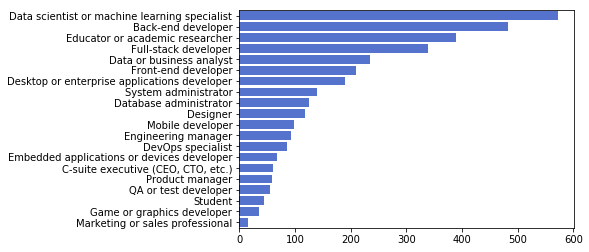

In [421]:
phd_dev_list = list()
for idx, response in good_jobs.iterrows():
    dev_type = response.DevType
    satisfaction = response.JobSatisfactionOrd
    if dev_type is not np.nan:
        for job in dev_type.split(';'):
            phd_dev_list.append((job, satisfaction))
phd_dev_df = pd.DataFrame(phd_dev_list, columns=['Job', 'Satisfaction'])
phd_dev_counts = Counter([response[0] for response in phd_dev_list])

phd_dev_counts = pd.Series(dict(phd_dev_counts))
phd_dev_counts = phd_dev_counts.sort_values(ascending=False)
sns.barplot(x=phd_dev_counts, y=phd_dev_counts.index, color='royalblue')
plt.show()

In [422]:
phd_dev_df.head()

,Job,Satisfaction
0,Designer,4.0
1,Embedded applications or devices developer,4.0
2,Data scientist or machine learning specialist,6.0
3,Back-end developer,2.0
4,Database administrator,2.0


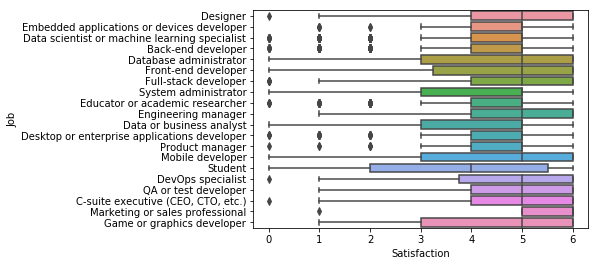

In [425]:
sns.boxplot(data=phd_dev_df, x='Satisfaction', y='Job')

In [431]:
phd_dev_df.groupby('Job').agg(['mean', 'median', 'std']).sort_values(by=('Satisfaction', 'mean'), ascending=False)

Satisfaction                 
                                                      mean median       std
Job                                                                        
Marketing or sales professional                   5.125000    6.0  1.726888
C-suite executive (CEO, CTO, etc.)                4.666667    5.0  1.662597
Designer                                          4.582418    5.0  1.535259
Product manager                                   4.477273    5.0  1.547521
Full-stack developer                              4.462295    5.0  1.572603
Game or graphics developer                        4.454545    5.0  1.710674
QA or test developer                              4.448980    5.0  1.595060
Engineering manager                               4.442857    5.0  1.638625
Educator or academic researcher                   4.407843    5.0  1.594262
Data scientist or machine learning specialist     4.405138    5.0  1.605650
Back-end developer                                4.384793    5.0  1.601630
Embedded applications or devices developer        4.355932    5.0  1.447503
Database administrator                            4.345794    5.0  1.721686
Front-end developer                               4.342697    5.0  1.646938
Desktop or enterprise applications developer      4.335294    5.0  1.568718
Data or business analyst                          4.327014    5.0  1.577273
Mobile developer                                  4.305882    5.0  1.864605
DevOps specialist                                 4.305556    5.0  1.733180
System administrator                              4.276423    5.0  1.714455
Student                                           3.684211    4.0  2.001461

## Stuff we use

In [434]:
phd_tools = df.loc[is_phd & ~is_compsci, 
                   ('DevType',
                    'LanguageWorkedWith', 'LanguageDesiredNextYear',
                    'DatabaseWorkedWith', 'DatabaseDesiredNextYear',
                    'PlatformWorkedWith', 'PlatformDesiredNextYear',
                    'FrameworkWorkedWith', 'FrameworkDesiredNextYear',
                    'IDE', 'OperatingSystem', 'VersionControl')]

In [435]:
phd_tools.head()

,DevType,LanguageWorkedWith,LanguageDesiredNextYear,DatabaseWorkedWith,DatabaseDesiredNextYear,PlatformWorkedWith,PlatformDesiredNextYear,FrameworkWorkedWith,FrameworkDesiredNextYear,IDE,OperatingSystem,VersionControl
236,Designer;Embedded applications or devices deve...,Assembly;C;C++;Matlab;Python;Bash/Shell,NaN,NaN,NaN,Linux,NaN,NaN,NaN,Eclipse;Notepad++,Linux-based,Git;Team Foundation Version Control
347,Data scientist or machine learning specialist,Groovy;Python;R;SQL;HTML;CSS;Bash/Shell,NaN,MySQL;Google BigQuery,NaN,Linux,NaN,TensorFlow,NaN,PyCharm;RStudio;Sublime Text;Vim,MacOS,Git
390,Back-end developer;Database administrator;Fron...,JavaScript;Python;SQL;HTML;CSS;Bash/Shell,NaN,Redis;PostgreSQL;Amazon DynamoDB,NaN,AWS;Linux;Serverless,NaN,Angular;Django,NaN,PyCharm;Vim,Linux-based,Git
393,Data scientist or machine learning specialist,C++;Python;R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IPython / Jupyter;Notepad++;RStudio,Windows,Git
398,Data scientist or machine learning specialist;...,C++;Julia;Python,NaN,NaN,NaN,Linux,NaN,Django;TensorFlow;Torch/PyTorch,NaN,Atom;IntelliJ;Notepad++;PyCharm;Sublime Text,Linux-based,Git


In [436]:
def graph_most_used(df, col):
    agg_list = list()
    for response in df[col]:
        if response is not np.nan:
            for item in response.split(';'):
                agg_list.append(item)
    counter = Counter(agg_list)
    
    counter_df = pd.Series(dict(counter))
    counter_df = counter_df.sort_values(ascending=False)
    sns.barplot(x=counter_df, y=counter_df.index, color='royalblue')
    plt.show()

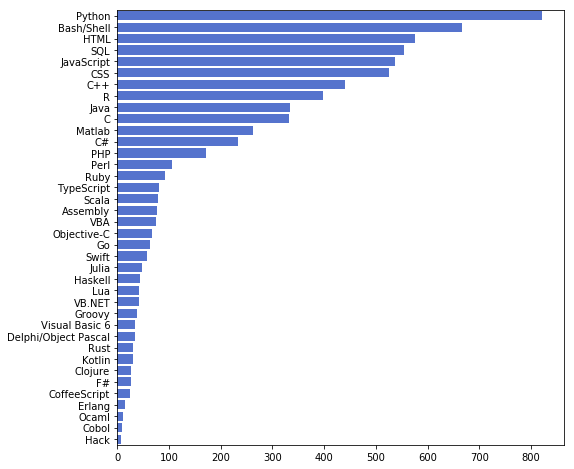

In [438]:
plt.figure(figsize=(8, 8))
graph_most_used(phd_tools, 'LanguageWorkedWith')

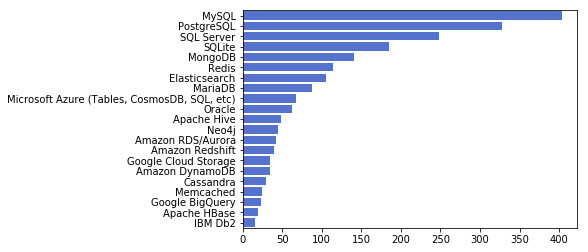

In [439]:
graph_most_used(phd_tools, 'DatabaseWorkedWith')

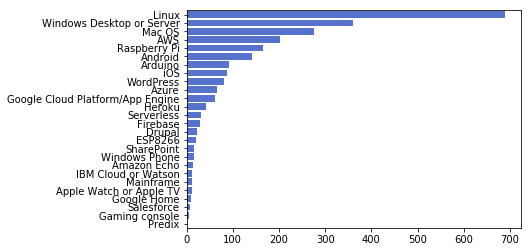

In [443]:
graph_most_used(phd_tools, 'PlatformWorkedWith')

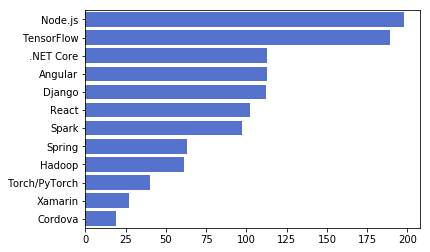

In [444]:
graph_most_used(phd_tools, 'FrameworkWorkedWith')

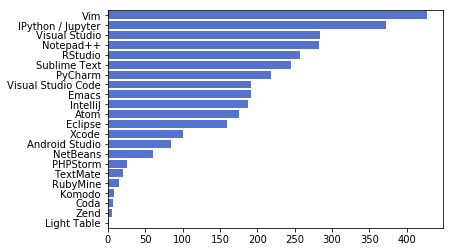

In [445]:
graph_most_used(phd_tools, 'IDE')

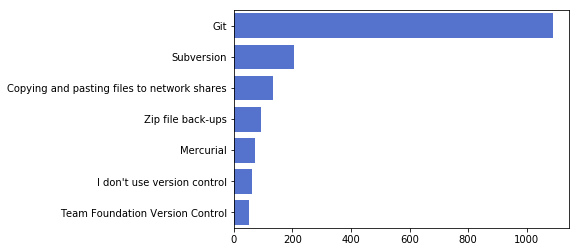

In [446]:
graph_most_used(phd_tools, 'VersionControl')

## OK, the last dealio - Predict

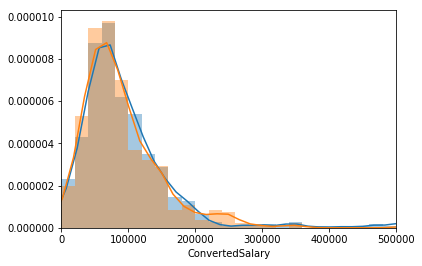

In [466]:
sns.distplot(df.loc[is_phd & ~is_compsci, 'ConvertedSalary'].dropna(), bins = 100, kde=True, norm_hist=True)
sns.distplot(df.loc[is_phd & is_compsci, 'ConvertedSalary'].dropna(), bins = 100, kde=True, norm_hist=True)
plt.xlim(0, 500000)
plt.show()

In [468]:
reg_cols = [
#     'Country',
#     'Employment',
#     'UndergradMajor',
    'CompanySize',
    'DevType',
    'YearsCoding',
#     'YearsCodingProf',
    'ConvertedSalary',
    'EducationTypes',
    'LanguageWorkedWith',
    'WakeTime',
    'HoursComputer',
    'HoursOutside',
    'SkipMeals',
    'Exercise',
#     'Gender',
#     'EducationParents',
#     'RaceEthnicity',
    'Age',
    'Dependents',
]

In [477]:
reg_df = df.loc[is_phd & ~is_compsci, reg_cols]

In [478]:
reg_df.shape

(1449, 20)

In [476]:
reg_df.isnull().sum()

Country                 0
Employment             23
UndergradMajor         90
CompanySize           299
DevType               131
YearsCoding            36
YearsCodingProf       320
ConvertedSalary       666
EducationTypes        255
LanguageWorkedWith    165
WakeTime              219
HoursComputer         220
HoursOutside          223
SkipMeals             222
Exercise              220
Gender                319
EducationParents      322
RaceEthnicity         402
Age                   310
Dependents            346
dtype: int64

In [497]:
reg_df.UndergradMajor.value_counts()

A natural science (ex. biology, chemistry, physics)                      599
Mathematics or statistics                                                273
Another engineering discipline (ex. civil, electrical, mechanical)       235
A social science (ex. anthropology, psychology, political science)        79
A humanities discipline (ex. literature, history, philosophy)             56
Information systems, information technology, or system administration     41
A business discipline (ex. accounting, finance, marketing)                25
A health science (ex. nursing, pharmacy, radiology)                       20
Fine arts or performing arts (ex. graphic design, music, studio art)      13
Web development or web design                                             12
I never declared a major                                                   6
Name: UndergradMajor, dtype: int64

In [499]:
reg_df.CompanySize.value_counts()

20 to 99 employees          206
10,000 or more employees    198
100 to 499 employees        197
1,000 to 4,999 employees    194
5,000 to 9,999 employees    111
10 to 19 employees           95
500 to 999 employees         79
Fewer than 10 employees      70
Name: CompanySize, dtype: int64

In [498]:
reg_df.columns

Index(['Country', 'Employment', 'UndergradMajor', 'CompanySize', 'DevType',
       'YearsCoding', 'YearsCodingProf', 'ConvertedSalary', 'EducationTypes',
       'LanguageWorkedWith', 'WakeTime', 'HoursComputer', 'HoursOutside',
       'SkipMeals', 'Exercise', 'Gender', 'EducationParents', 'RaceEthnicity',
       'Age', 'Dependents'],
      dtype='object')

In [480]:
pprint(list(reg_df.YearsCoding.unique()))

['9-11 years',
 '15-17 years',
 '6-8 years',
 '12-14 years',
 '0-2 years',
 '21-23 years',
 '18-20 years',
 '30 or more years',
 '3-5 years',
 '24-26 years',
 '27-29 years',
 nan]


In [481]:
years_coding_mapping = {
    '0-2 years': 0,
    '3-5 years': 1,
    '6-8 years': 2,
    '9-11 years': 3,
    '12-14 years': 4,
    '15-17 years': 5,
    '18-20 years': 6,
    '21-23 years': 7,
    '24-26 years': 8,
    '27-29 years': 9,
    '30 or more years': 10, 
}

In [482]:
pprint(list(reg_df.YearsCodingProf.unique()))

['9-11 years',
 '3-5 years',
 '6-8 years',
 '0-2 years',
 '12-14 years',
 '18-20 years',
 nan,
 '21-23 years',
 '30 or more years',
 '24-26 years',
 '15-17 years',
 '27-29 years']


In [484]:
years_coding_prof_mapping = {
    '0-2 years': 0,
    '3-5 years': 1,
    '6-8 years': 2,
    '9-11 years': 3,
    '12-14 years': 4,
    '15-17 years': 5,
    '18-20 years': 6,
    '21-23 years': 7,
    '24-26 years': 8,
    '27-29 years': 9,
    '30 or more years': 10, 
}

In [506]:
pprint(list(reg_df.CompanySize.unique()))

['1,000 to 4,999 employees',
 '100 to 499 employees',
 '10 to 19 employees',
 '20 to 99 employees',
 '5,000 to 9,999 employees',
 '500 to 999 employees',
 '10,000 or more employees',
 'Fewer than 10 employees',
 nan]


In [507]:
company_size_mapping = {
    'Fewer than 10 employees': 0,
    '10 to 19 employees': 1,
    '20 to 99 employees': 2,
    '100 to 499 employees': 3,
    '500 to 999 employees': 4,
    '1,000 to 4,999 employees': 5,
    '5,000 to 9,999 employees': 6,
    '10,000 or more employees': 7,
}

In [509]:
reg_df.WakeTime.value_counts()

Between 6:01 - 7:00 AM          423
Between 7:01 - 8:00 AM          351
Between 5:00 - 6:00 AM          182
Between 8:01 - 9:00 AM          134
I do not have a set schedule     46
Between 9:01 - 10:00 AM          40
Before 5:00 AM                   30
Between 10:01 - 11:00 AM         13
Between 11:01 AM - 12:00 PM       6
After 12:01 PM                    3
I work night shifts               2
Name: WakeTime, dtype: int64